In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001189396"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001189396
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SOMERSET HILLS BANCORP
Ticker,SOMH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,20.0,7.496000e+00,2.525324e-01,7.15,7.292500e+00,7.455,7.72,7.93
interest income,31.0,4.350744e+06,3.843991e+06,3951.00,3.308500e+06,3454000.000,3521500.00,15782000.00
net income,29.0,7.326015e+05,4.950902e+05,444.00,4.750000e+05,603000.000,820000.00,2198000.00
net interest income,31.0,3.151035e+06,2.436818e+06,2437.00,2.491500e+06,2726000.000,2941000.00,10713000.00
provision for loan losses,31.0,1.025531e+05,1.193761e+05,0.00,2.500000e+04,75000.000,144000.00,515000.00


# Plots

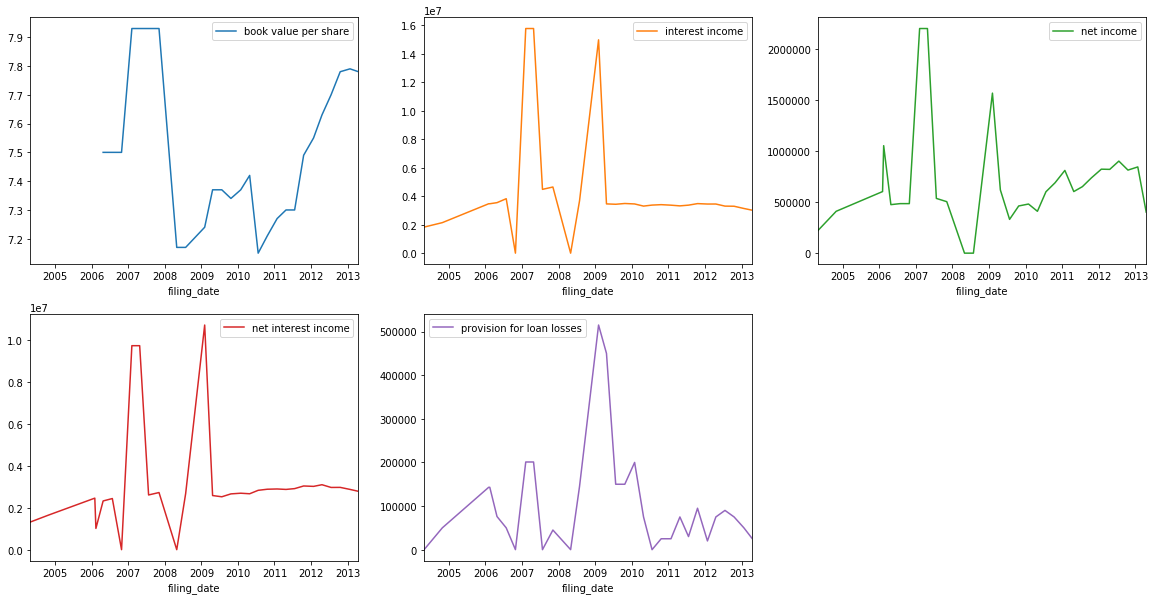

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0001189396 book value per share       2004Q1 to 2005Q4: 8 periods    missing   
           book value per share       2006Q2 to 2006Q3: 2 periods    missing   
           book value per share       2007Q1 to 2007Q4: 4 periods    missing   
           book value per share       2008Q2 to 2008Q3: 2 periods    missing   
           book value per share                            2009Q2    missing   
           book value per share                            2011Q2    missing   
           interest income                                 2004Q2    missing   
           interest income            2004Q4 to 2005Q3: 4 periods    missing   
           interest income                                 2007Q1    missing   
           interest income                                 2007Q4    missing   
           interest income                                 2008Q3    missing   
           net income                                      2004Q2    missing   
           net income                 2004Q4 to 2005Q3: 4 periods    missing   
           net income                                      2005Q4  duplicate   
           net income                                      2006Q3    missing   
           net income                                      2007Q1    missing   
           net income                                      2007Q4    missing   
           net income                 2008Q2 to 2008Q3: 2 periods    missing   
           net interest income                             2004Q2    missing   
           net interest income        2004Q4 to 2005Q3: 4 periods    missing   
           net interest income                             2005Q4  duplicate   
           net interest income                             2007Q1    missing   
           net interest income                             2007Q4    missing   
           net interest income                             2008Q3    missing   
           provision for loan losses                       2004Q2    missing   
           provision for loan losses  2004Q4 to 2005Q3: 4 periods    missing   
           provision for loan losses                       2007Q1    missing   
           provision for loan losses                       2007Q4    missing   
           provision for loan losses                       2008Q3    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0001189396 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()